In [1]:
using OrdinaryDiffEq, ForwardDiff, Distributions, RandomNumbers, NPZ, PyPlot, StaticArrays, HDF5, CSV, DelimitedFiles

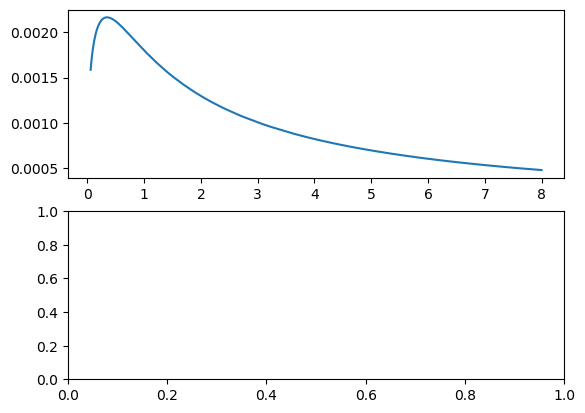

6.2271482254988575

In [2]:
Ns=16
Times=5000#000
listas=[0.6]
N=0
solu=0
w=0
alpha = 0.2
omega0 = 2 # (frequencia del sistema de dos niveles)
wc = 7*omega0/2
s = 0.1
a = 2.
b = 1.
Hpart!(x,p)=p^2. /2. -0.5*2. *x^2. +0.25*1. *x^4.
Hosci!(x,p,w)=p^2. /(0.1*2.)+0.05*w^2. *x^2.
Hcoup!(x,X,w,g)=-g*x*X +x*x*g*g/(2. *0.1*w*w)
#values=range(0.1,stop=6,length=9230329)
#golden=(1. +sqrt(5.))/2.
#mydist!(x)=x^0.515 * exp(-x/golden)
#probabilities = mydist!.(values)

pygui(false)
#fig, axes = subplots(nrows=2, ncols=1)
#subplot(2, 1, 1)
#plot(values,probabilities)
#sumaprob=sum(probabilities)
#probabilities=probabilities./sumaprob
#subplot(2, 1, 2)
#plot(values,probabilities)
#println(wp)
#plot(wp,weights)
probabilities=npzread("probs0.3.npy")
vals=npzread("values0.3.npy")
fig, axes = subplots(nrows=2, ncols=1)
subplot(2, 1, 1)
plot(vals,probabilities)
#xlim([0.3,0.8])
d = Categorical(probabilities)
vals[rand(d)] # sampling
#savefig("distribuciones.png")

In [8]:
s=0.3
lista=[0.3,0.32,0.34,0.36,0.38,0.4,0.42,0.44,0.46,0.48,0.5,0.52,0.54,0.56,0.58,0.62,0.64,0.66,0.68,0.7,0.72,0.74,0.76,0.78,0.8]
#lista=[0.3]
nnn=0.
for oo in lista
println(nnn/size(lista)[1])
nnn=nnn+1.
s=oo

probabilities=npzread("probs$s.npy")
vals=npzread("values$s.npy")
#fig, axes = subplots(nrows=2, ncols=1)
#subplot(2, 1, 1)
#plot(vals,probabilities)
#xlim([0.3,0.8])
d = Categorical(probabilities)

# BOX MULLER
arraysize=100
u1 = rand(arraysize)
u2 = rand(arraysize)
#println(u1)
#println(u2)
z0 = map.(sqrt,-2* map.(log,u1)) .*map.(cos,2. *pi*u2)
z1 = map.(sqrt,-2* map.(log,u1)) .*map.(sin,2. *pi*u2)
#scatter(z0,z1)
#s=0.3

xz0=z0*0.15
pz1=z1*0.1
#Xz0=z0 .-33.5
#Pz1=z1*0.1 .+1.45
Pz1=z1*0.01*sqrt(0.05*2*0.1).-1. *0.01*sqrt(0.05*2*0.1)
Xz0=z0*0.01*sqrt((2*0.05)/(0.1*0.3*0.3)).+1. *0.01*sqrt((2*0.05)/(0.1*0.3*0.3))
#scatter(Xz0,Pz1)
#println(Pz1)
#println(Xz0)

function bolz_energy(a)
    return rand(Truncated(Normal(1), 0., 5))
end
N=arraysize
Times=10000#150000
w=zeros(N+1)
for ii in 1:N
    ii=Int(ii)
    w[ii+1] = vals[rand(d)]
end
function initial_sampling(Eb,w1,mb)
    #nums=rand(1)*1.5*pi.-0.5*pi
    nums=rand(1)*2. *pi
    x1=cos(nums[1])*sqrt(Eb/(0.5*mb*w1*w1))
    y1=sin(nums[1])*sqrt(2*mb*Eb)
    return x1,y1
end

Es=zeros(N+1)
Es=(bolz_energy.(Es))
Es=Es./(sum(Es[2:end])/0.1)
#initial_position=x0
#initial_momentum=p0
initial_position=zeros(N+1)
initial_momentum=zeros(N+1)
a=2.
b=1.

time=Times
#time=1.
tspan=(0., time)
g=zeros(N+1)
E=zeros(N+1)
m=ones(N+1) .*0.1
m[1]=1.
g00=0.1
g=g .* 0. .+ g00/sqrt(N)
#g=g .* 0. .+ 0.1/N
#g=g .* 0. .+ 0.1
W=12.
dts=0.1*2. *pi/W
#w[2]=0.66103076727067554

#E0=Hosci!(x0[2],p0[2],w[2])
#w=[0.0, 1.0213848227990752, 0.49280185811239285, 3.9612563679665787, 0.8313325208892569, 4.412630585002398, 2.1082464243458494, 6.1409187054948084, 2.0785507521724402, 1.4490025020961665, 0.6175236812407112, 3.4089168655411686, 2.2686030540822584, 1.2411327968823027, 4.590804618042853, 5.855840252630081]
#w=[1.4929064282270392, 0.7711005827026584, 0.01398351063734149, 0.5448755681128806, 0.8153942696601976]
#w=[0.0, 0.37528801404179746, 0.6360187014716939]
#w=[0.,0.5036118423070709, 0.29071094541241266]
#w=[0.0, 0.6902646834201959, 0.3957031685385455, 0.6161868371034245, 0.6348521212147369, 0.44878257023009044, 0.6272693495445162, 0.745677245625655, 0.414368452649858, 0.5047784225640279, 0.7065968070175943]
#w=[0.0, 0.4394499281744342, 0.7911738756469792, 0.7083466774030299, 0.357789310187442, 0.49311261999445766]
initial_position=Xz0
initial_momentum=Pz1
#println(initial_position)
#println(initial_momentum)

initial_position=pushfirst!(initial_position, 0.)
initial_momentum=pushfirst!(initial_momentum, 0.)
#initial_position=[0.0, 0.7991151013418429, -0.053002312574290444, -2.9624044392199833, 0.14043108368683033, 2.148848573004341]
#initial_momentum=[0.0, -0.03211701448752664, -0.01912203877339066, 0.024609646218932087, 0.0014788003664714978, 0.01272421508032925]
if oo==0.3
    w=[0.0, 0.5747008269930457, 0.9642506477058232, 0.9960506330701315, 1.9182502086350741, 6.099948284041624, 7.356047705931805, 0.20900099530349953, 3.102799663455561, 1.9421001976583052, 3.3174495646646425, 2.236250062278158, 1.385600453782909, 1.1868505452559817, 4.5814989828959, 6.131748269405932, 1.751300285472455, 3.675199400013111, 2.8165997951767854, 0.08180105384626607, 0.7337007538145875, 7.276547742521034, 0.423650896512581, 1.6956503110849155, 0.8291007099075126, 1.2266005269613671, 4.39069907071005, 0.20105099896242243, 0.6065008123573541, 3.1584496378431006, 3.993199253656195, 0.34415093310181005, 1.035800614775517, 4.017049242679426, 2.784799809812477, 1.488950406216911, 3.969349264632964, 4.128349191454506, 0.9006506769772065, 0.1374510282338057, 6.863147932785025, 5.233398682864221, 7.268597746179957, 1.735400292790301, 6.529248086459787, 3.190249623207409, 5.543448540166228, 5.559348532848382, 2.1965000805727724, 0.08180105384626607, 0.20105099896242243, 5.328798638957147, 1.926200204976151, 5.893248379173619, 4.366849081686818, 6.250998214522089, 2.6257998829909353, 2.4985999415337017, 1.234550523302444, 1.043750611116594, 0.21695099164457662, 6.982397877901181, 3.540049462214801, 7.363997702272882, 0.4872508672411977, 0.16925101359811406, 0.7814007318610501, 1.3458504720775235, 3.2538495939360255, 2.96764972565725, 0.3521009294428871, 0.20105099896242243, 0.46340087821796644, 2.705299846401706, 1.1868505452559817, 2.331650018371083, 3.977299260974041, 0.4713508745590435, 1.4333004318293714, 3.9534492719508094, 0.4077509038304268, 3.2379496012538715, 3.206149615889563, 1.5923003586509132, 0.9404006586825919, 5.010798785314063, 1.6400003366973759, 2.951749732975096, 5.122098734089142, 7.332197716908573, 4.684848935329902, 2.8960997585875563, 1.8149002562010719, 2.768899817130323, 3.325399561005719, 0.6144508086984312, 7.77739751200889, 0.2885009587142704, 3.555949454896955, 1.290200497689984, 1.3776504574418318]
end
initial_position=[0.0, 0.042428429046106886, 0.039081087111846324, 0.02174922560258566, 0.01083299422224273, 0.06539576032637694, -0.022122942304968272, -0.000542338542199837, 0.022087016858395488, 0.032170847654611125, -0.023536212825695173, 0.01578884712985955, 0.04881681683654486, 0.010543437497489302, 0.0537958783969315, 0.05240394051245481, -0.02092080082798388, 0.004329462104859266, 0.06262910460200749, 0.06893357451105032, 0.01912019996553959, 0.031855565229943456, -0.014384185692871539, 0.06803338992312268, 0.047946019248827514, 0.09675414066424118, -0.008883391835846445, 0.009209219185470956, 0.02833454583054039, 0.043995568682484075, 0.05647123451091042, 0.054024359792701926, 0.014308128041781387, 0.03183436348068332, 0.06737693648214371, 0.019326401784661752, 0.010148903030209502, 0.01424760606238492, 0.029893246244504075, 0.06554350698044342, 0.026759049260281224, 0.06118607573724791, 0.04069352594079682, 0.06235507239355187, 0.012284573055664025, -0.004307679240882337, 0.03277158996027586, 0.00675789061465748, 0.026078550515598018, 0.027944528982793617, 0.048436673568361864, 0.03327301851552817, 0.11295383928254013, 0.03212944591891699, 0.03393246796254231, 0.040151837824124036, 0.01303422696750214, 0.07609340492385389, 0.04473013066794453, 0.03980959009465765, 0.06510130371179237, 0.05812841047741779, 0.05120223655050524, -0.037697023425547975, 0.046084989320106275, 0.02009166168087669, 0.008393044334404732, 0.029578186090178347, 0.0015605164737027555, 0.04321076900195842, 0.04744309522102195, 0.07022297576621996, -0.001314954509999168, 0.001159330355240136, 0.10919226776638577, 0.028342527502573808, 0.051814496097312354, 0.017534873978276876, 0.024691515346598115, 0.06310216529282445, 0.024155337065677036, 0.013938393111618028, 0.023350832530851268, -0.007164253249020772, 0.018741837947926228, 0.04323764062168041, 0.018740371368952374, 0.019506401626143085, 0.025557618401970565, 0.06253666106994558, -0.025544693684977228, 0.0545445455723209, -0.02752133239789259, 0.0332616936932344, 0.01385059933513998, -0.0016059529245152845, 0.027850798585428105, 0.07116406807580894, 0.03562012700228512, 0.024729842656010505, 0.07435830849119424]
initial_momentum= [0.0, -0.0002470646086057131, -0.001086738143954924, -7.754411717425308e-5, -0.0024984079796324505, -0.0001431290804859626, 7.278596490521792e-6, -0.0015568413623092488, -0.001981349988205372, -0.000855150202612401, 0.0001319577696969399, 0.00027863556932737924, -1.2033535197607205e-5, 5.79215517094024e-6, -0.0005876401635904803, -0.0005438942915676641, -0.0011710796987614105, -0.0012482520453964319, -0.0001485810096644876, -0.0009629819942856745, -0.000964293362051101, -0.0006354880795350669, -0.0015646849190917333, -0.0011246596020317186, -0.0012363930636873268, -0.0004644194424184173, 0.0003409114580411926, -0.0007022347050245998, 0.000876139089410191, -0.0014695495814077183, -0.0016155432615936106, -0.0010853205518057255, -0.0023680508941174416, -0.0026017997892856994, 0.0005727549479626667, -0.0001942375084778579, 0.00021084501946065756, 0.0014258964502263704, -0.0011669481582274762, 3.125459068458662e-5, -0.00023918908205906473, -0.0009583129043613717, -0.0021624077460480956, -0.0005938937978926481, -0.0009291155748040383, -0.00164218515070989, -0.0014734267454514095, -0.0006791274554291359, -0.001829843721823599, 0.0003809646476295916, -0.00025250846873261254, -0.0018525214567523623, -0.0006128595019754795, -0.002137640947455299, -0.0016254610738001766, -0.0022843249438254908, -0.0019604977023344947, -0.0013913843850020986, 0.00016012171840251027, 4.657394655947344e-5, 0.00040922400810528784, -0.00021346006027927284, -0.00030860849859795723, -0.0012893318478892082, 0.0003237760393186651, -0.00018709035888063734, 0.00031528320309672864, -0.00040699571842053373, -0.0004560891920105868, -0.00031371536273010854, -0.0004226522712738862, -0.00019000285932567332, -0.0005971756287715996, -0.001168415181903778, -0.0019483203853232754, -0.002056732102728058, -0.0012386635961374292, 0.0008838774223828552, -0.002011528218343473, -0.0003097951684942928, -0.0009684698205410133, -0.0031048578848569906, 2.1166618777831037e-5, 0.0002758112540704146, -0.001303113674162935, 0.0006702434543951672, -0.0008210532150610947, -0.0009416248747781088, -0.0014784268861969805, -0.00032689398101011513, -0.0025956978427587865, -0.00043300418535972417, -0.001992436615003165, -0.0015282658321019492, -0.0014930412404802313, -0.0004447544103484745, -0.001264425804988502, -0.0020403444130628677, -0.0011853605296048742, 0.00016083512344656223, -0.0010599563020689301]
E0=0
for i in 2:N+1
    i=Int(i)
    
    E0=E0+Hosci!(initial_position[i],initial_momentum[i],w[i])
end
#initial_position[2+2]=(-1. )*initial_position[2+2]
#initial_momentum[2+3]=(-1. )*initial_momentum[2+3]
#initial_position[2+5]=(-1. )*initial_position[2+5]
#initial_momentum[2+12]=(-1. )*initial_momentum[2+12]
#println("E0= ", E0)
#println("w0= ", w)
#println("x0= ", initial_position)
#println("p0= ", initial_momentum)
#println(Es)


function Hsys(q,p,N0)
    result=p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4.
    for i in 1:N0
        result +=  -q[1]*g[i+1]*q[i+1]+p[i+1]^2. /(2. *m[2])+m[i+1]*w[i+1]^2. *q[i+1]^2. /2. + q[1]^2. *g[i+1]^2. /(2. *m[i+1]*w[i+1]^2.) 
    end
    return result
end
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p,N), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p,N), p)
prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
@time sol = solve(prob, VerletLeapfrog(), dt=dts, abstol=1e-14, reltol=1e-14) #CalvoSanz4
pygui(false)
fig, axes = subplots(nrows=2, ncols=1)

inis=[w, initial_position, initial_momentum]

writedlm( "info_N$N _s$s.csv", inis, ',')
subplot(2, 1, 1)
title("Random case s=$s, N=$N oscillators \n \n Initial energy = $E0 , coupling g=$g00 /sqrt(N) \n \n Particle Energy vs time for N=$N oscillators")
xlabel("t")
ylabel("H_{particle}")
axhline(y=1., color="g", linestyle="-")
plot(sol.t[:], (Hpart!.(sol[N+2,:]  ,sol[1,:])).+1.,color=(0.68,75/255,102/255),linewidth=0.5,alpha=0.8)
#xscale("log")
ylim([0,1.1])
PyPlot.grid()
subplot(2, 1, 2)
title("Particle position vs time for N=$N oscillators")
xlabel("t")
ylabel("x")
plot(sol.t[:], sol[N+2,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
#xscale("log")
#xlim([10,sol.t[end]])
#subplot(3, 1, 3)
#title("Oscillators total energy vs time for N=$N oscillators")
#xlabel("t")
#ylabel("H_{oscillators}")
#Eoscirand=0
#axhline(y=1., color="g", linestyle="-")
#for i in 1:N
#    i=Int(i)
#    Eoscirand=Eoscirand .+ Hosci!.(sol[N+2+i,:],sol[1+i,:],w[i+1])
#end
#plot(sol.t[:], Eoscirand,color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
#xscale("log")
#xlim([10,sol.t[end]])
fig.tight_layout()
PyPlot.grid()
savefig("dynamics_$N _$s.png")
PyPlot.close()
fig, axes = subplots(nrows=2, ncols=1)
subplot(2, 1, 1)
title("Random case s=$s, N=$N oscillators \n \n Initial energy = $E0 , coupling g=$g00 /sqrt(N) \n \n Initial conditions in phase space")    

xlabel("x")
ylabel("p")
scatter(initial_position[1],initial_momentum[1],label="particle")
scatter(initial_position[2:end],initial_momentum[2:end],label="oscillators")
legend()
PyPlot.grid()

subplot(2, 1, 2)
title("Particle phase space")
xlabel("x")
ylabel("p")
plot(sol[N+2,:], sol[1,:],color=(0.,75/255,102/255),linewidth=0.5,alpha=0.8)
fig.tight_layout()
PyPlot.grid()
savefig("locs_$N _$s.png")
PyPlot.close()
end

0.0
1260.431627 seconds (13.47 G allocations: 718.535 GiB, 17.87% gc time)
0.04
1256.986413 seconds (13.46 G allocations: 718.250 GiB, 20.43% gc time)
0.08
1430.429479 seconds (13.46 G allocations: 718.250 GiB, 27.17% gc time)
0.12
1297.928497 seconds (13.46 G allocations: 718.250 GiB, 22.60% gc time)
0.16
1304.762233 seconds (13.46 G allocations: 718.250 GiB, 23.26% gc time)
0.2
1071.978159 seconds (13.46 G allocations: 718.250 GiB, 25.68% gc time)
0.24
998.090608 seconds (13.46 G allocations: 718.250 GiB, 22.33% gc time)
0.28
1070.678812 seconds (13.46 G allocations: 718.250 GiB, 25.53% gc time)
0.32
1021.998281 seconds (13.46 G allocations: 718.250 GiB, 24.72% gc time)
0.36
1036.513520 seconds (13.46 G allocations: 718.250 GiB, 24.11% gc time)
0.4
1056.211455 seconds (13.46 G allocations: 718.250 GiB, 26.46% gc time)
0.44
1016.138306 seconds (13.46 G allocations: 718.250 GiB, 25.37% gc time)
0.48
1155.592663 seconds (13.46 G allocations: 718.250 GiB, 29.85% gc time)
0.52
1062.719734